In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow
from tqdm import tqdm

# groundtruth

In [3]:
# from KECENI.RegressionModel import FittedRegressionModel
# from KECENI.PropensityModel import FittedPropensityModel
# from KECENI.CovariateModel import FittedCovariateModel

In [4]:
# from true_model import mu, pi, rX

In [5]:
# n_X = 10000

In [6]:
# true_model = KECENI.Model(
#     FittedRegressionModel(mu),
#     FittedPropensityModel(pi),
#     FittedCovariateModel(rX),
#     delta
# )

In [7]:
# true_fit = true_model.fit(data)

In [8]:
# result_true = true_fit.G_estimate(
#     np.arange(0,G.n_node,10)[:,None], np.stack([T1s, T2s], 0), n_X=n_X, tqdm=tqdm
# )

In [9]:
# YTR1s, YTR2s = np.moveaxis(result_true, -1, 0)
# YTRds = YTR1s - YTR2s

In [10]:
EYTR1, EYTR2 = (0.593984501067794, 0.40608837990296737)
EYTRd = EYTR1 - EYTR2

In [11]:
EYTR1, EYTR2, EYTRd

(0.593984501067794, 0.40608837990296737, 0.18789612116482662)

In [12]:
# plt.hist(YTRds[YTRds > 0])

# load result

In [13]:
result_ate = pd.read_feather('result_tmlenet_X.feather')

In [14]:
Yhat1 = result_ate.Yhat1.values
Yhat2 = result_ate.Yhat2.values
Yhatd = Yhat1 - Yhat2

# results

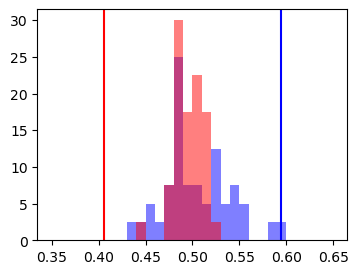

In [16]:
fig = plt.figure(figsize=(4,3))
plt.hist(Yhat1, color='blue', alpha=0.5, density=True, bins=np.arange(0.35,0.65,0.01))
plt.axvline(EYTR1, color='blue')
plt.hist(Yhat2, color='red', alpha=0.5, density=True, bins=np.arange(0.35,0.65,0.01))
plt.axvline(EYTR2, color='red')

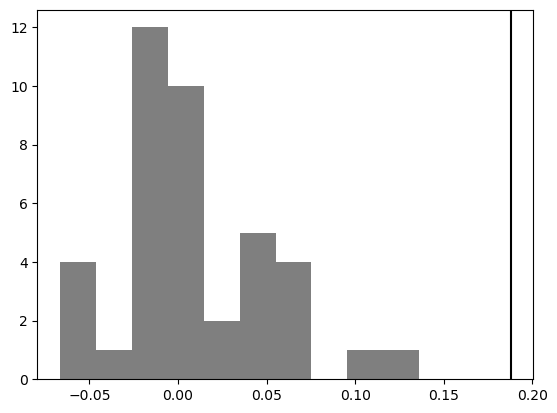

In [16]:
plt.hist(Yhatd, color='black', alpha=0.5)
plt.axvline(EYTRd, color='black')

In [17]:
np.sqrt(np.mean((Yhatd - EYTRd)**2, 0))

0.18420763653180003